<a href="https://colab.research.google.com/github/harshithach999/Data-Science-Project/blob/main/XLM_Roberta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install textstat
import textstat

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.utils import shuffle
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.chunk import RegexpParser
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import pos_tag, RegexpParser
from textblob import TextBlob
from textstat import flesch_reading_ease, lexicon_count
from tabulate import tabulate
import nltk

In [ ]:
file_paths = ['LLM_generated_essay_PaLM.csv', 'train_essays.csv']  # file paths

In [ ]:
# Function to load and preprocess data
def load_and_preprocess_data(file_paths):
    dfs = [pd.read_csv(file_path) for file_path in file_paths]
    data = pd.concat(dfs, ignore_index=True)
    # Remove 'id' column
    data = data.drop('id', axis=1)

# Convert 'prompt_id' and 'generated' columns from float to integer
    data['prompt_id'] = data['prompt_id'].astype(int)
    data['generated'] = data['generated'].astype(int)
    return data



In [ ]:
train = load_and_preprocess_data(file_paths)

In [ ]:
train.head()

,prompt_id,text,generated
0,0,## The Advantages of Limiting Car Usage\n\nIn ...,1
1,0,"The United States is a car-dependent nation, w...",1
2,0,"In recent years, there has been a growing move...",1
3,0,"In recent years, there has been a growing move...",1
4,0,"In the past few decades, the United States has...",1


In [ ]:
#!pip install transformers

In [ ]:
#from huggingface_hub import notebook_login

#notebook_login()

In [ ]:
!pip install transformers

In [ ]:
data1=train

Roberta



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup
import torch

# Split your dataset into train and validation
#train_df, val_df = train_test_split(data1['text'], data1['generated'], test_size=0.2)



In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plotter
import plotly.graph_objects as go
import plotly.express as px

from sklearn.model_selection import train_test_split
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# SET GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        strategy = tf.distribute.OneDeviceStrategy(device="/gpu:0")
    except RuntimeError as e:
        print(e)
else:
    strategy = tf.distribute.get_strategy()
    print('Number of replicas:', strategy.num_replicas_in_sync)

In [ ]:
import os
os.environ["WANDB_API_KEY"] = "0"

In [ ]:
train=train.rename(columns={'generated': "label"})
train

,prompt_id,text,label
0,0,## The Advantages of Limiting Car Usage\n\nIn ...,1
1,0,"The United States is a car-dependent nation, w...",1
2,0,"In recent years, there has been a growing move...",1
3,0,"In recent years, there has been a growing move...",1
4,0,"In the past few decades, the United States has...",1
...,...,...,...
2757,1,There has been a fuss about the Elector Colleg...,0
2758,0,Limiting car usage has many advantages. Such a...,0
2759,0,There's a new trend that has been developing f...,0
2760,0,As we all know cars are a big part of our soci...,0


In [ ]:
train, test = train_test_split(train, test_size=0.2, random_state=42)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [ ]:
print("head")
display(train.head())
display(test.head())
print("info")
display(train.info())
display(test.info())

head


,prompt_id,text,label
0,0,"In recent years, there has been a growing move...",1
1,0,In today's growing world to many it may seem a...,0
2,0,"Germany,France, and Columbia,all have somethin...",0
3,0,Many people do not rely on their cars to take ...,0
4,1,"Dear Senator,\n\nI am writing to you today to ...",1


,prompt_id,text,label
0,0,"In recent years, there has been a growing move...",1
1,0,As we all know cars are a big part of our soci...,0
2,1,"Dear Senator,\n\nI am writing to you today to ...",1
3,0,Cars have been a huge advancement in technolog...,0
4,0,"In recent years, there has been a growing move...",1


info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2209 entries, 0 to 2208
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   prompt_id  2209 non-null   int64 
 1   text       2209 non-null   object
 2   label      2209 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 51.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   prompt_id  553 non-null    int64 
 1   text       553 non-null    object
 2   label      553 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 13.1+ KB


None

**Model XLM-Roberta**

In [ ]:
!pip install evaluate

In [ ]:
import evaluate
import torch
from transformers import AdamW, AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding, TrainingArguments, Trainer

In [ ]:
model_name = 'symanto/xlm-roberta-base-snli-mnli-anli-xnli'
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
train.columns

Index(['prompt_id', 'text', 'label'], dtype='object')

In [ ]:
test.columns

Index(['prompt_id', 'text', 'label'], dtype='object')

In [ ]:
# delete unnecessary columns
train = train.drop(labels=['prompt_id'], axis=1)
test = test.drop(labels=['prompt_id'], axis=1)

In [ ]:
from datasets import Dataset, DatasetDict

In [ ]:
train_df, val_df = train_test_split(train, test_size=0.2, random_state=42)


train_ds = Dataset.from_pandas(train_df)
val_ds = Dataset.from_pandas(val_df)
test_ds = Dataset.from_pandas(test)

ds = DatasetDict()
ds['train'] = train_ds
ds['validation'] = val_ds
ds['test'] = test_ds

In [ ]:
def tokenizer_sentence(data):
    return tokenizer(data['text'], truncation=True)  #feature columns

**Map**

In [ ]:
tokenized_ds = ds.map(tokenizer_sentence, batched=True)

Map:   0%|          | 0/1767 [00:00<?, ? examples/s]

Map:   0%|          | 0/442 [00:00<?, ? examples/s]

Map:   0%|          | 0/553 [00:00<?, ? examples/s]

In [ ]:
tokenized_ds

DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 1767
    })
    validation: Dataset({
        features: ['text', 'label', '__index_level_0__', 'input_ids', 'attention_mask'],
        num_rows: 442
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 553
    })
})

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
!pip install evaluate

In [ ]:
import evaluate
import torch
from transformers import AdamW, AutoTokenizer, AutoModelForSequenceClassification, DataCollatorWithPadding, TrainingArguments, Trainer

In [ ]:

from datasets import Dataset, DatasetDict

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)



import torch.nn as nn
from transformers import XLMRobertaModel

class CustomXLMRobertaModel(nn.Module):
    def __init__(self, num_labels):
        super(CustomXLMRobertaModel, self).__init__()
        model_name = 'symanto/xlm-roberta-base-snli-mnli-anli-xnli'
        self.roberta = XLMRobertaModel.from_pretrained(model_name)
        self.dropout = nn.Dropout(0.2)
        self.classifier = nn.Sequential(
            nn.Linear(768, 512),
            nn.LayerNorm(512),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(512, num_labels)
        )
        self.loss = nn.CrossEntropyLoss()
        self.num_labels = num_labels

    def forward(self, input_ids, attention_mask, labels=None):
        output = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        output = self.dropout(output.pooler_output)
        logits = self.classifier(output)

        if labels is not None:
            loss = self.loss(logits.view(-1, self.num_labels), labels.view(-1))
            return {"loss": loss, "logits": logits}
        else:
            return logits



model = CustomXLMRobertaModel(num_labels=2)


Some weights of XLMRobertaModel were not initialized from the model checkpoint at symanto/xlm-roberta-base-snli-mnli-anli-xnli and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
pip install transformers[torch]


In [ ]:
pip install accelerate -U

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score
from datasets import load_metric

training_args = TrainingArguments(
                                  output_dir="roberta-large-lora-token-classification",
                                  optim="adamw_torch",
                                  num_train_epochs=3,
                                  evaluation_strategy="epoch",
                                  logging_dir='./logs',
                                  logging_steps=10,
                                report_to="none")

f1_metric = load_metric("f1")
precision_metric = load_metric('precision')
def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return {
        'accuracy': accuracy_score(labels, predictions),
        'precision': precision_metric.compute(predictions=predictions, references=labels, average="micro"),
        'f1': f1_metric.compute(predictions=predictions, references=labels, average="micro")}



from transformers import Trainer

trainer = Trainer(
    model,
    args=training_args,
    train_dataset=tokenized_ds["train"],
    eval_dataset=tokenized_ds["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from datasets import load_metric

training_args = TrainingArguments(output_dir="roberta-large-lora-token-classification",
                                  optim="adamw_torch",
                                  num_train_epochs=1,
                                  evaluation_strategy="epoch",
                                  logging_dir='./logs',
                                  logging_steps=10,
                                report_to="none")

f1_metric = load_metric("f1")

def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    return {
        'accuracy': accuracy_score(labels, predictions),
        'f1': f1_metric.compute(predictions=predictions, references=labels, average="micro")
    }

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model,
    args=training_args,
    train_dataset=tokenized_ds["train"],
    eval_dataset=tokenized_ds["validation"],
    data_collator=data_collator,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.9/264.9 kB 30.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00


In [ ]:
import os
os.environ["WANDB_DISABLED"] = "false"

In [40]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.000600,0.015663,0.995475,{'f1': 0.995475113122172}


TrainOutput(global_step=221, training_loss=0.1110404171996457, metrics={'train_runtime': 218.3865, 'train_samples_per_second': 8.091, 'train_steps_per_second': 1.012, 'total_flos': 0.0, 'train_loss': 0.1110404171996457, 'epoch': 1.0})

In [41]:
predictions = trainer.predict(tokenized_ds["test"])
predictions

PredictionOutput(predictions=array([[-3.8944092,  4.0382323],
       [ 3.9924703, -4.513545 ],
       [-3.8877516,  4.0098233],
       ...,
       [-3.890145 ,  4.030397 ],
       [ 3.9999435, -4.505571 ],
       [ 4.0029826, -4.5001726]], dtype=float32), label_ids=array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
    

In [ ]:
logits = torch.from_numpy(predictions.predictions)
logits

In [43]:
test_pred_df=pd.DataFrame(logits)
test_pred_df

,0,1
0,-3.894409,4.038232
1,3.992470,-4.513545
2,-3.887752,4.009823
3,4.014497,-4.437614
4,-3.894307,4.044500
...,...,...
548,-3.897695,4.030275
549,3.985305,-4.515874
550,-3.890145,4.030397
551,3.999943,-4.505571


In [44]:
#test_pred_df=((test_pred_df[0])**2+(test_pred_df[1])**2)**0.5
#test_pred_df=test_pred_df[0]+test_pred_df[1]
test_pred_df=test_pred_df[0]
test_pred_df=pd.DataFrame(test_pred_df)
test_pred_df

,0
0,-3.894409
1,3.992470
2,-3.887752
3,4.014497
4,-3.894307
...,...
548,-3.897695
549,3.985305
550,-3.890145
551,3.999943


In [45]:
test_pred_df[0][test_pred_df[0] <= 0] = 0
test_pred_df[0][test_pred_df[0] > 0] = 1
test_pred_df[0] = test_pred_df[0].replace({0:1,1:0}) #reverse

In [46]:
test_pred_df=test_pred_df.set_axis(axis=1,labels=['Test_pred'])
test_pred_df

,Test_pred
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
548,1.0
549,0.0
550,1.0
551,0.0


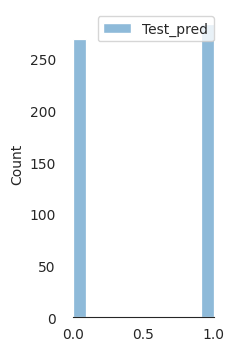

In [47]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(2, 4))
sns.histplot(test_pred_df)
ax.xaxis.grid(False)
sns.despine(trim=True, left=True)
plt.show()

In [48]:
test_pred_all=test.merge(test_pred_df,how='inner',left_index=True,right_index=True)
test_pred_all


,text,label,Test_pred
0,"In recent years, there has been a growing move...",1,1.0
1,As we all know cars are a big part of our soci...,0,0.0
2,"Dear Senator,\n\nI am writing to you today to ...",1,1.0
3,Cars have been a huge advancement in technolog...,0,0.0
4,"In recent years, there has been a growing move...",1,1.0
...,...,...,...
548,"In recent years, there has been a growing move...",1,1.0
549,Dear senatoor of Florida. I am here tooday too...,0,0.0
550,"Dear Senator,\n\nI am writing to you today to ...",1,1.0
551,Many people around the world drive vehicles to...,0,0.0


**Accuracy**

accuracy is: 99.458%


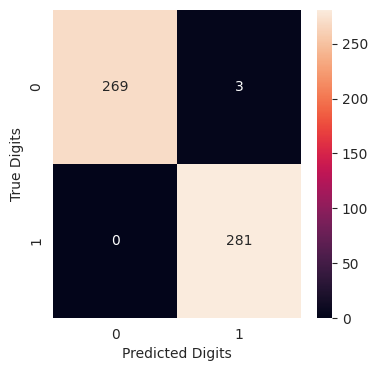

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score
acc = accuracy_score(test_pred_all['label'], test_pred_all['Test_pred'])
print("accuracy is: {0:.3f}%".format(acc * 100))
cm = confusion_matrix(test_pred_all['label'] , test_pred_all['Test_pred'])
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.show()